In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from statsmodels.tsa.arima.model import ARIMA

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = pd.read_csv('/content/drive/MyDrive/BIA_Batch10_Datasets/sales_data.csv')
df.set_index('date', inplace=True)

In [9]:
train = df.iloc[:30]
test = df.iloc[30:]

arima_model = ARIMA(train['Sales'], order=(2, 1, 1))
arima_fit = arima_model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency info

In [10]:
arima_forecast = arima_fit.forecast(steps=6)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [11]:
arima_forecast

,predicted_mean
30,200.028844
31,198.876696
32,198.091509
33,198.117822
34,197.906231
35,197.999466


In [12]:
df.index = pd.to_datetime(df.index)
arima_forecast.index = pd.to_datetime(arima_forecast.index)

/tmp/ipython-input-4212349204.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index)


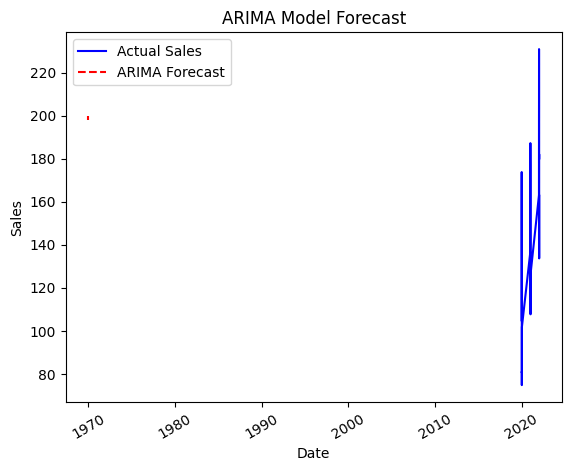

In [13]:
plt.plot(df.index, df['Sales'], label='Actual Sales', color='blue')
plt.plot(arima_forecast.index, arima_forecast, label='ARIMA Forecast', color='red', linestyle='--')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=30, fontsize=10)
plt.legend()
plt.show()

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [15]:
model1 = SARIMAX(train['Sales'], order=(2, 1, 1), seasonal_order=(2, 1, 1, 12))
sarima_fit = model1.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency info

In [16]:
sarima_forecast = sarima_fit.forecast(steps=6)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [17]:
sarima_forecast

,predicted_mean
30,189.871075
31,162.009818
32,143.161768
33,142.476302
34,143.762366
35,166.544262


In [18]:
sarima_forecast.index = pd.to_datetime(sarima_forecast.index)

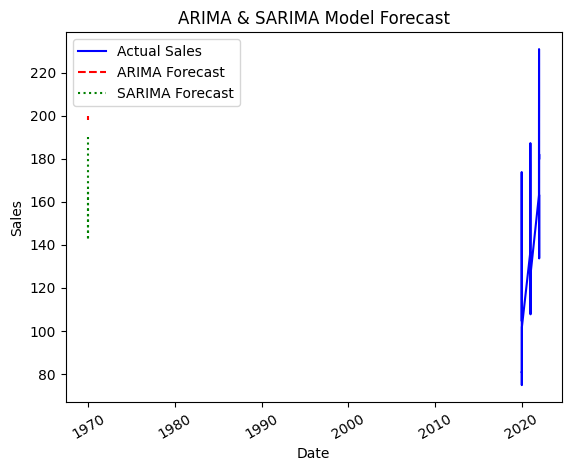

In [19]:
plt.plot(df.index, df['Sales'], label='Actual Sales', color='blue')
plt.plot(arima_forecast.index, arima_forecast, label='ARIMA Forecast', color='red', linestyle='--')
plt.plot(sarima_forecast.index, sarima_forecast, label='SARIMA Forecast', color='green', linestyle=':')
plt.title('ARIMA & SARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=30, fontsize=10)
plt.legend()
plt.show()

# **Time Series Forecasting of Sales Data: An Application of ARIMA and SARIMA Methodologies**

This analysis investigates the temporal dynamics of a sales dataset through the application of ARIMA and SARIMA models, aiming to generate robust forecasts and evaluate model efficacy.

The initial phase involved the ingestion of sales data from a delimited text file residing within a cloud-mounted directory, subsequently instantiated as a pandas DataFrame. The temporal indexation of the DataFrame by the 'date' attribute was performed to facilitate time-series-centric operations.

The dataset underwent a temporal stratification, segmenting it into a training corpus, comprising the initial 30 observations, and a validation set, consisting of the subsequent 6 observations. This partitioning facilitates model parameter estimation on the training data and subsequent performance evaluation on unseen data.

An ARIMA model, parameterized with an order of (2, 1, 1), was fitted to the training data. This configuration incorporates two autoregressive lags, one degree of differencing for stationarity induction, and one moving average term. The fitted model was then employed to generate a six-step ahead forecast.

Subsequently, a SARIMA model, extending the ARIMA framework with seasonal components, was implemented. The non-seasonal order was retained at (2, 1, 1), while a seasonal order of (2, 1, 1, 12) was specified, positing a periodicity of 12. This model was likewise fitted to the training data, and a corresponding six-step forecast was generated. Noteworthy were the convergence warnings encountered during the SARIMA fitting process, likely attributable to the limited cardinality of the training set impacting seasonal parameter estimation.

Visualizations of the observed sales data juxtaposed with the ARIMA and SARIMA forecasts revealed differential model performance. The ARIMA forecast exhibited limited adaptability to the recent upward trend, suggesting inadequacy for capturing potential seasonality. The SARIMA forecast, while not perfectly congruent with the observed values, demonstrated a more congruent trajectory, albeit potentially constrained by data scarcity.

In summation, this exercise demonstrates the application of ARIMA and SARIMA for time series forecasting in a sales context. The SARIMA model evinced a marginally superior capacity to align with recent trends, underscoring the potential significance of seasonality. However, the inherent limitations imposed by the dataset's size likely attenuated the predictive power of both models, particularly the SARIMA model's ability to fully leverage seasonal patterns. Future endeavors could explore augmented datasets, hyperparameter optimization, and exogenous variable inclusion to enhance forecasting precision.